<a href="https://colab.research.google.com/github/HunterAlpha7/Arnage/blob/main/SIM_Lab_Test_0432220005101066_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Seyam Bin H Rahman** <br>
ID: *0432220005101066*<br>

# Task


In [1]:
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import numpy as np


data = [
    [1, 93], [2, 83], [3, 69], [4, 62], [5, 75],
    [6, 93], [7, 73], [8, 77], [9, 65], [10, 65],
    [11, 78], [12, 90], [13, 94], [14, 78], [15, 57],
    [16, 76], [17, 56], [18, 78], [19, 84], [20, 92]
]

df = pd.DataFrame(data, columns=['Student_ID', 'Exam_Score'])
display(df.head())

,Student_ID,Exam_Score
0,1,93
1,2,83
2,3,69
3,4,62
4,5,75


## Basic statistics



In [3]:
mean_score = df['Exam_Score'].mean()
variance_score = df['Exam_Score'].var()
std_dev_score = df['Exam_Score'].std()

print(f"Mean exam score: {mean_score:.2f}")
print(f"Sample variance of exam score: {variance_score:.2f}")
print(f"Sample standard deviation of exam score: {std_dev_score:.2f}")

Mean exam score: 76.90
Sample variance of exam score: 143.25
Sample standard deviation of exam score: 11.97


Population variance uses all data points from the entire group, while sample variance uses a subset of data points and adjusts the denominator to better estimate the true population variance.

2. Random Number Generator

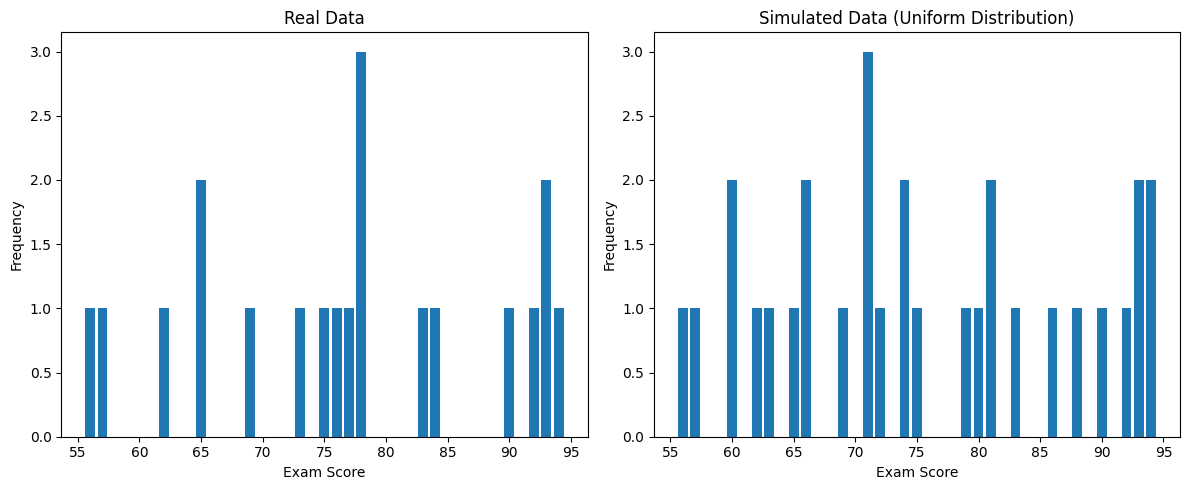

In [4]:
import numpy as np
import matplotlib.pyplot as plt

simulated_scores = np.random.randint(df['Exam_Score'].min(), df['Exam_Score'].max() + 1, size=30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['Exam_Score'], bins=range(df['Exam_Score'].min(), df['Exam_Score'].max() + 2), align='left', rwidth=0.8)
axes[0].set_title("Real Data")
axes[0].set_xlabel("Exam Score")
axes[0].set_ylabel("Frequency")

axes[1].hist(simulated_scores, bins=range(df['Exam_Score'].min(), df['Exam_Score'].max() + 2), align='left', rwidth=0.8)
axes[1].set_title("Simulated Data (Uniform Distribution)")
axes[1].set_xlabel("Exam Score")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Monte carlo simulation

In [5]:
num_simulations = 100000
min_score = df['Exam_Score'].min()
max_score = df['Exam_Score'].max()

simulated_scores_mc = np.random.uniform(min_score, max_score + 1, size=num_simulations)

scores_greater_than_15 = np.sum(simulated_scores_mc > 15)

estimated_probability = scores_greater_than_15 / num_simulations

print(f"Estimated probability of more than 15 score: {estimated_probability:.4f}")

Estimated probability of more than 15 score: 1.0000


## Hypothesis testing


Hypothesized mean: 66.00
T-statistic: 4.07
P-value: 0.0006


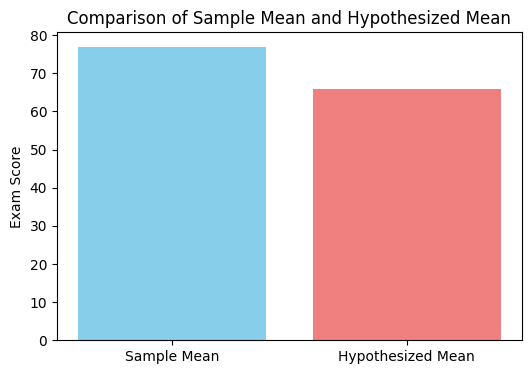


T-test Interpretation:
With a p-value of 0.0006, which is less than the significance level of 0.05, we reject the null hypothesis.
This suggests that the true mean of exam scores is statistically significantly different from the hypothesized mean of 66.00.


In [6]:
# 1. Calculate the hypothesized mean using ID 066
hypothesized_mean = (66 % 50) + 50
print(f"Hypothesized mean: {hypothesized_mean:.2f}")

# 3. Perform a one-sample t-test
t_statistic, p_value = ttest_1samp(df['Exam_Score'], popmean=hypothesized_mean)

# 4. Print the t-statistic and p-value
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# 5. Create a bar plot comparing the mean_score and hypothesized_mean
labels = ['Sample Mean', 'Hypothesized Mean']
values = [mean_score, hypothesized_mean]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])

# 6. Add labels to the x and y axes and a title to the bar plot
plt.ylabel("Exam Score")
plt.title("Comparison of Sample Mean and Hypothesized Mean")

# 7. Display the plot
plt.show()

# 8. Write a brief interpretation of the t-test results
print("\nT-test Interpretation:")
if p_value < 0.05:
    print(f"With a p-value of {p_value:.4f}, which is less than the significance level of 0.05, we reject the null hypothesis.")
    print(f"This suggests that the true mean of exam scores is statistically significantly different from the hypothesized mean of {hypothesized_mean:.2f}.")
else:
    print(f"With a p-value of {p_value:.4f}, which is greater than or equal to the significance level of 0.05, we fail to reject the null hypothesis.")
    print(f"This suggests that there is not enough statistical evidence to conclude that the true mean of exam scores is significantly different from the hypothesized mean of {hypothesized_mean:.2f}.")